# 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# 全局变量

In [2]:
batch_size=512
lr  = 1
epoch_num = 20
num_workers=0

# 构造数据集

In [3]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=num_workers)

# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [4]:
inputs = 784
hiddens = 256
out = 10
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.relu = torch.nn.ReLU()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t
net = Net()

loss =  torch.nn.CrossEntropyLoss()
sgd = torch.optim.SGD(params=net.parameters(),lr=lr)



In [5]:
import time

train_loss =[]
test_loss = []
train_acc=[]
test_acc= []
start_time = time.time()
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = loss(y_hat,y)
        sgd.zero_grad()
        l.backward()
        sgd.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss.append(train_loss_mean)
    train_acc.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = loss(y_hat,y)
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss.append(test_loss_mean)
    test_acc.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.8289182644623976 train_acc: 0.7093182425213675 
 test_loss: 1.6439273671100014 test_acc: 0.8389185855263158
epoch: 2 
 train_loss: 1.639287178332989 train_acc: 0.8361712072649573 
 test_loss: 1.6227237676319324 test_acc: 0.8493009868421053
epoch: 3 
 train_loss: 1.6249757526267288 train_acc: 0.8450854700854701 
 test_loss: 1.6150841399243003 test_acc: 0.8526932565789473
epoch: 4 
 train_loss: 1.59767297292367 train_acc: 0.8753171741452992 
 test_loss: 1.5577665441914608 test_acc: 0.9161184210526315
epoch: 5 
 train_loss: 1.5541000987729456 train_acc: 0.9195045405982906 
 test_loss: 1.5423743599339534 test_acc: 0.9294819078947368
epoch: 6 
 train_loss: 1.5436025358672836 train_acc: 0.9271834935897436 
 test_loss: 1.5363575408333225 test_acc: 0.9329769736842105
epoch: 7 
 train_loss: 1.5366104474434485 train_acc: 0.9338274572649573 
 test_loss: 1.5316137451874583 test_acc: 0.9381167763157895
epoch: 8 
 train_loss: 1.5312396186029809 train_acc: 0.9385516826923077 

# 训练

# 模型评估
训练用时225，45秒
实验结果中提供了准确率（acc）的数值，对于epoch 1，准确率约为 83.89%，而对于epoch 20，准确率提高到约为 96.43%。
根据实验结果，我们可以看到损失（loss）在每个epoch中都在减小，从初始值约为1.64逐渐减小到约为1.50（约为epoch 20时的值）。这显示了模型在训练数据上的逐渐优化。

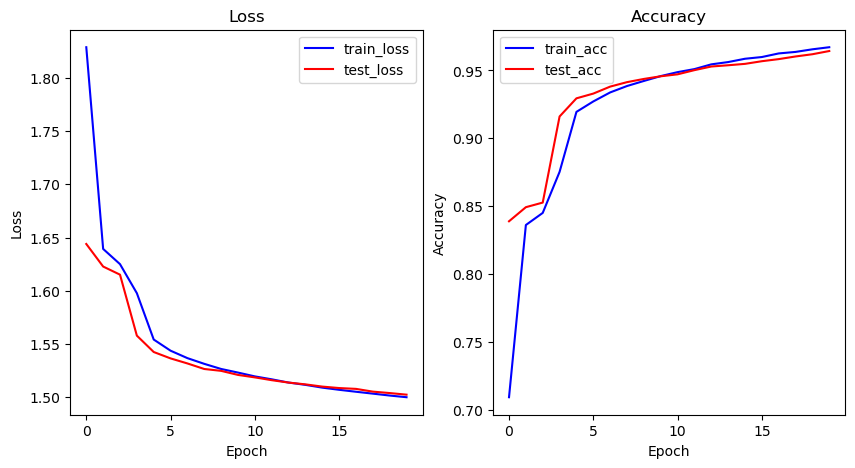

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'b-',label="train_acc")
plt.plot(test_acc, 'r-' ,label="test_acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()